<a href="https://colab.research.google.com/github/AIceDog/Pyotrch-Notes/blob/master/Pytorch_Model_Learning_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

# TORCH.NN.FUNCTIONAL.CONV1D

torch.nn.functional.conv1d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1) → Tensor

Input is one-dimensional input, with the shape of (batch size, in channel, Length); batch size is the size of training batch; in channel is the number of input channels; Length is the Length of input, because it is one-dimensional input, it has only Length. 

weight is a one-dimensional convolution kernel, whose shape is (out channel, in channel / group, kernel size); out channel is the number of output channels; in channel / group aims to determine how the output of each layer is composed of input, which will be described in detail later.

In [ ]:
Batch_Size = 6
In_Channel = 4
Length = 10
inputs = torch.randint(10, (Batch_Size, In_Channel, Length))
print(inputs.shape)
print(inputs)

torch.Size([6, 4, 10])
tensor([[[0, 8, 9, 5, 1, 9, 8, 2, 4, 2],
         [2, 7, 5, 0, 8, 7, 5, 8, 4, 3],
         [0, 9, 6, 7, 9, 2, 2, 5, 8, 9],
         [5, 7, 3, 0, 1, 9, 7, 2, 5, 7]],

        [[3, 7, 8, 3, 9, 4, 3, 7, 3, 1],
         [6, 1, 6, 3, 1, 1, 5, 4, 4, 4],
         [0, 7, 2, 0, 0, 4, 7, 9, 1, 9],
         [1, 1, 1, 5, 2, 9, 0, 8, 4, 5]],

        [[1, 5, 0, 3, 7, 1, 8, 2, 1, 1],
         [8, 3, 9, 5, 1, 5, 8, 5, 0, 1],
         [7, 8, 9, 5, 8, 4, 7, 3, 9, 3],
         [4, 1, 9, 7, 9, 2, 8, 7, 7, 9]],

        [[2, 3, 6, 9, 2, 2, 5, 1, 8, 3],
         [8, 8, 5, 7, 3, 4, 9, 0, 3, 6],
         [4, 4, 7, 6, 4, 7, 5, 2, 3, 7],
         [8, 4, 7, 1, 0, 4, 1, 6, 5, 2]],

        [[6, 7, 8, 7, 9, 6, 8, 4, 4, 8],
         [9, 7, 7, 9, 5, 3, 4, 3, 9, 8],
         [0, 5, 1, 8, 2, 4, 9, 0, 8, 3],
         [3, 3, 2, 5, 3, 2, 8, 2, 8, 7]],

        [[3, 5, 1, 6, 9, 9, 3, 9, 3, 9],
         [7, 1, 2, 7, 8, 5, 2, 1, 1, 9],
         [9, 5, 5, 0, 9, 9, 9, 7, 7, 4],
         [8, 7, 8, 8, 5,

In [ ]:
Out_Channel = 7
Group = 1
Kernel_Size = 3
filters = torch.randint(10, (Out_Channel, int(In_Channel/Group), Kernel_Size))
print(filters.shape)
print(filters)

torch.Size([7, 4, 3])
tensor([[[7, 8, 1],
         [7, 4, 0],
         [6, 2, 5],
         [5, 0, 9]],

        [[1, 5, 5],
         [5, 0, 2],
         [8, 9, 2],
         [8, 1, 3]],

        [[1, 0, 6],
         [4, 6, 6],
         [8, 8, 2],
         [9, 6, 9]],

        [[2, 6, 2],
         [7, 9, 2],
         [6, 0, 6],
         [9, 6, 1]],

        [[2, 4, 8],
         [9, 3, 2],
         [9, 9, 8],
         [3, 3, 2]],

        [[1, 4, 4],
         [8, 7, 7],
         [6, 6, 8],
         [9, 0, 9]],

        [[9, 1, 5],
         [0, 9, 5],
         [9, 6, 0],
         [6, 9, 4]]])


In [ ]:
result = F.conv1d(inputs, filters)
print(result.shape)
print(result)

torch.Size([6, 7, 8])
tensor([[[215, 338, 258, 235, 307, 302, 285, 284],
         [254, 312, 236, 238, 268, 239, 221, 250],
         [332, 311, 241, 368, 371, 310, 316, 321],
         [279, 351, 219, 189, 337, 347, 291, 269],
         [324, 391, 307, 305, 364, 288, 297, 350],
         [342, 364, 315, 343, 371, 359, 370, 370],
         [300, 337, 249, 360, 354, 339, 314, 261]],

        [[169, 243, 178, 248, 162, 286, 232, 304],
         [199, 171, 135, 162, 134, 276, 245, 237],
         [201, 215, 183, 197, 185, 363, 303, 316],
         [155, 197, 176, 190, 188, 267, 233, 315],
         [254, 200, 205, 177, 205, 322, 307, 298],
         [236, 230, 171, 251, 185, 406, 279, 360],
         [174, 265, 229, 154, 251, 303, 310, 318]],

        [[319, 254, 344, 236, 300, 266, 345, 225],
         [290, 238, 336, 269, 285, 232, 256, 240],
         [366, 391, 446, 312, 412, 334, 351, 322],
         [280, 276, 376, 277, 295, 286, 348, 199],
         [361, 335, 422, 301, 335, 296, 340, 255],
     

In [ ]:
import numpy as np

In [ ]:
test_input1 = np.array([[0, 8, 9], 
                       [2, 7, 5], 
                       [0, 9, 6], 
                       [5, 7, 3]])

test_filter1 = np.array([[7, 8, 1], 
                        [7, 4, 0], 
                        [6, 2, 5], 
                        [5, 0, 9]])

In [ ]:
sum(sum(test_input1 * test_filter1))

215

In [ ]:
test_input2 = np.array([[8, 9, 5], 
                       [7, 5, 0], 
                       [9, 6, 7], 
                       [7, 3, 0]])

test_filter2 = np.array([[7, 8, 1], 
                        [7, 4, 0], 
                        [6, 2, 5], 
                        [5, 0, 9]])

In [ ]:
sum(sum(test_input2 * test_filter2))

338

In [ ]:
test_input3 = np.array([[3, 7, 8], 
                       [6, 1, 6], 
                       [0, 7, 2], 
                       [1, 1, 1]])

test_filter3 = np.array([[7, 8, 1], 
                        [7, 4, 0], 
                        [6, 2, 5], 
                        [5, 0, 9]])

In [ ]:
sum(sum(test_input3 * test_filter3))

169

In [ ]:
test_input4 = np.array([[0, 8, 9], 
                       [2, 7, 5], 
                       [0, 9, 6], 
                       [5, 7, 3]])

test_filter4 = np.array([[1, 5, 5], 
                        [5, 0, 2], 
                        [8, 9, 2], 
                        [8, 1, 3]])

In [ ]:
sum(sum(test_input4 * test_filter4))

254

In [ ]:
test_input5 = np.array([[0, 8, 9], 
                       [2, 7, 5], 
                       [0, 9, 6], 
                       [5, 7, 3]])

test_filter5 = np.array([[1, 0, 6], 
                        [4, 6, 6], 
                        [8, 8, 2], 
                        [9, 6, 9]])

In [ ]:
sum(sum(test_input5 * test_filter5))

332

In [ ]:
test_input5 = np.array([[3, 7, 8], 
                       [6, 1, 6], 
                       [0, 7, 2], 
                       [1, 1, 1]])

test_filter5 = np.array([[7, 8, 1], 
                        [7, 4, 0], 
                        [6, 2, 5], 
                        [5, 0, 9]])

In [ ]:
sum(sum(test_input5 * test_filter5))

169

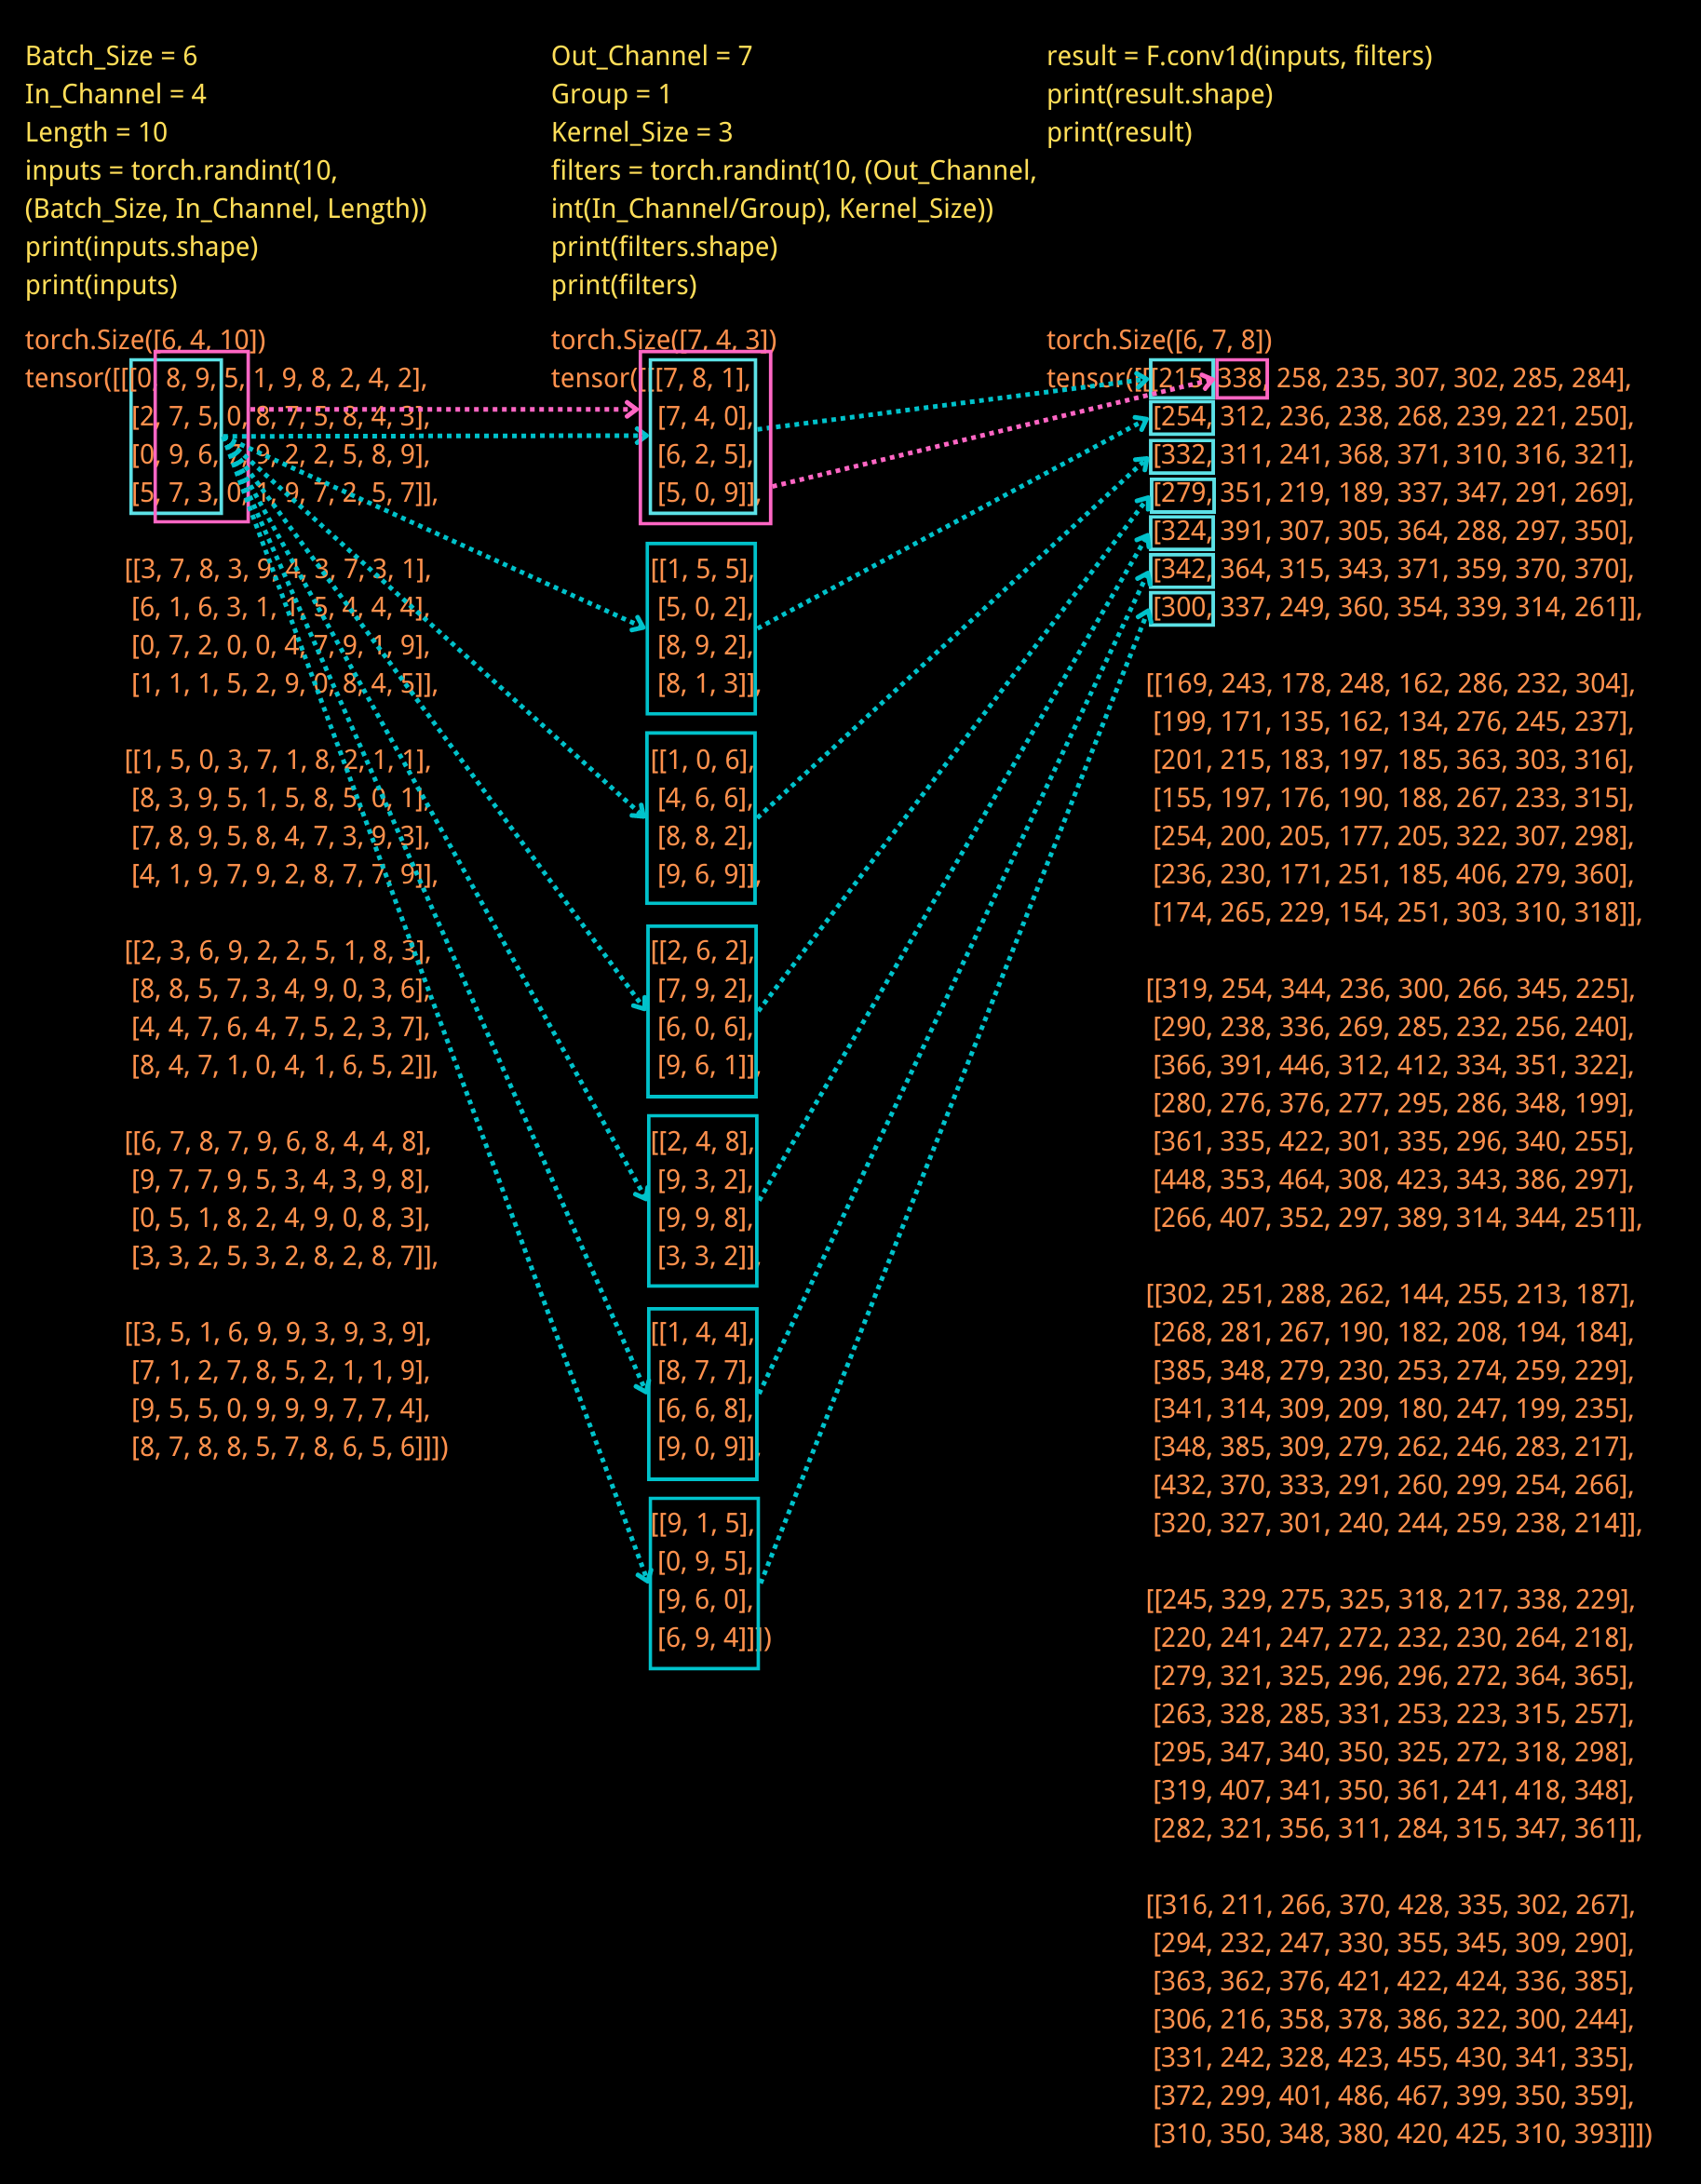

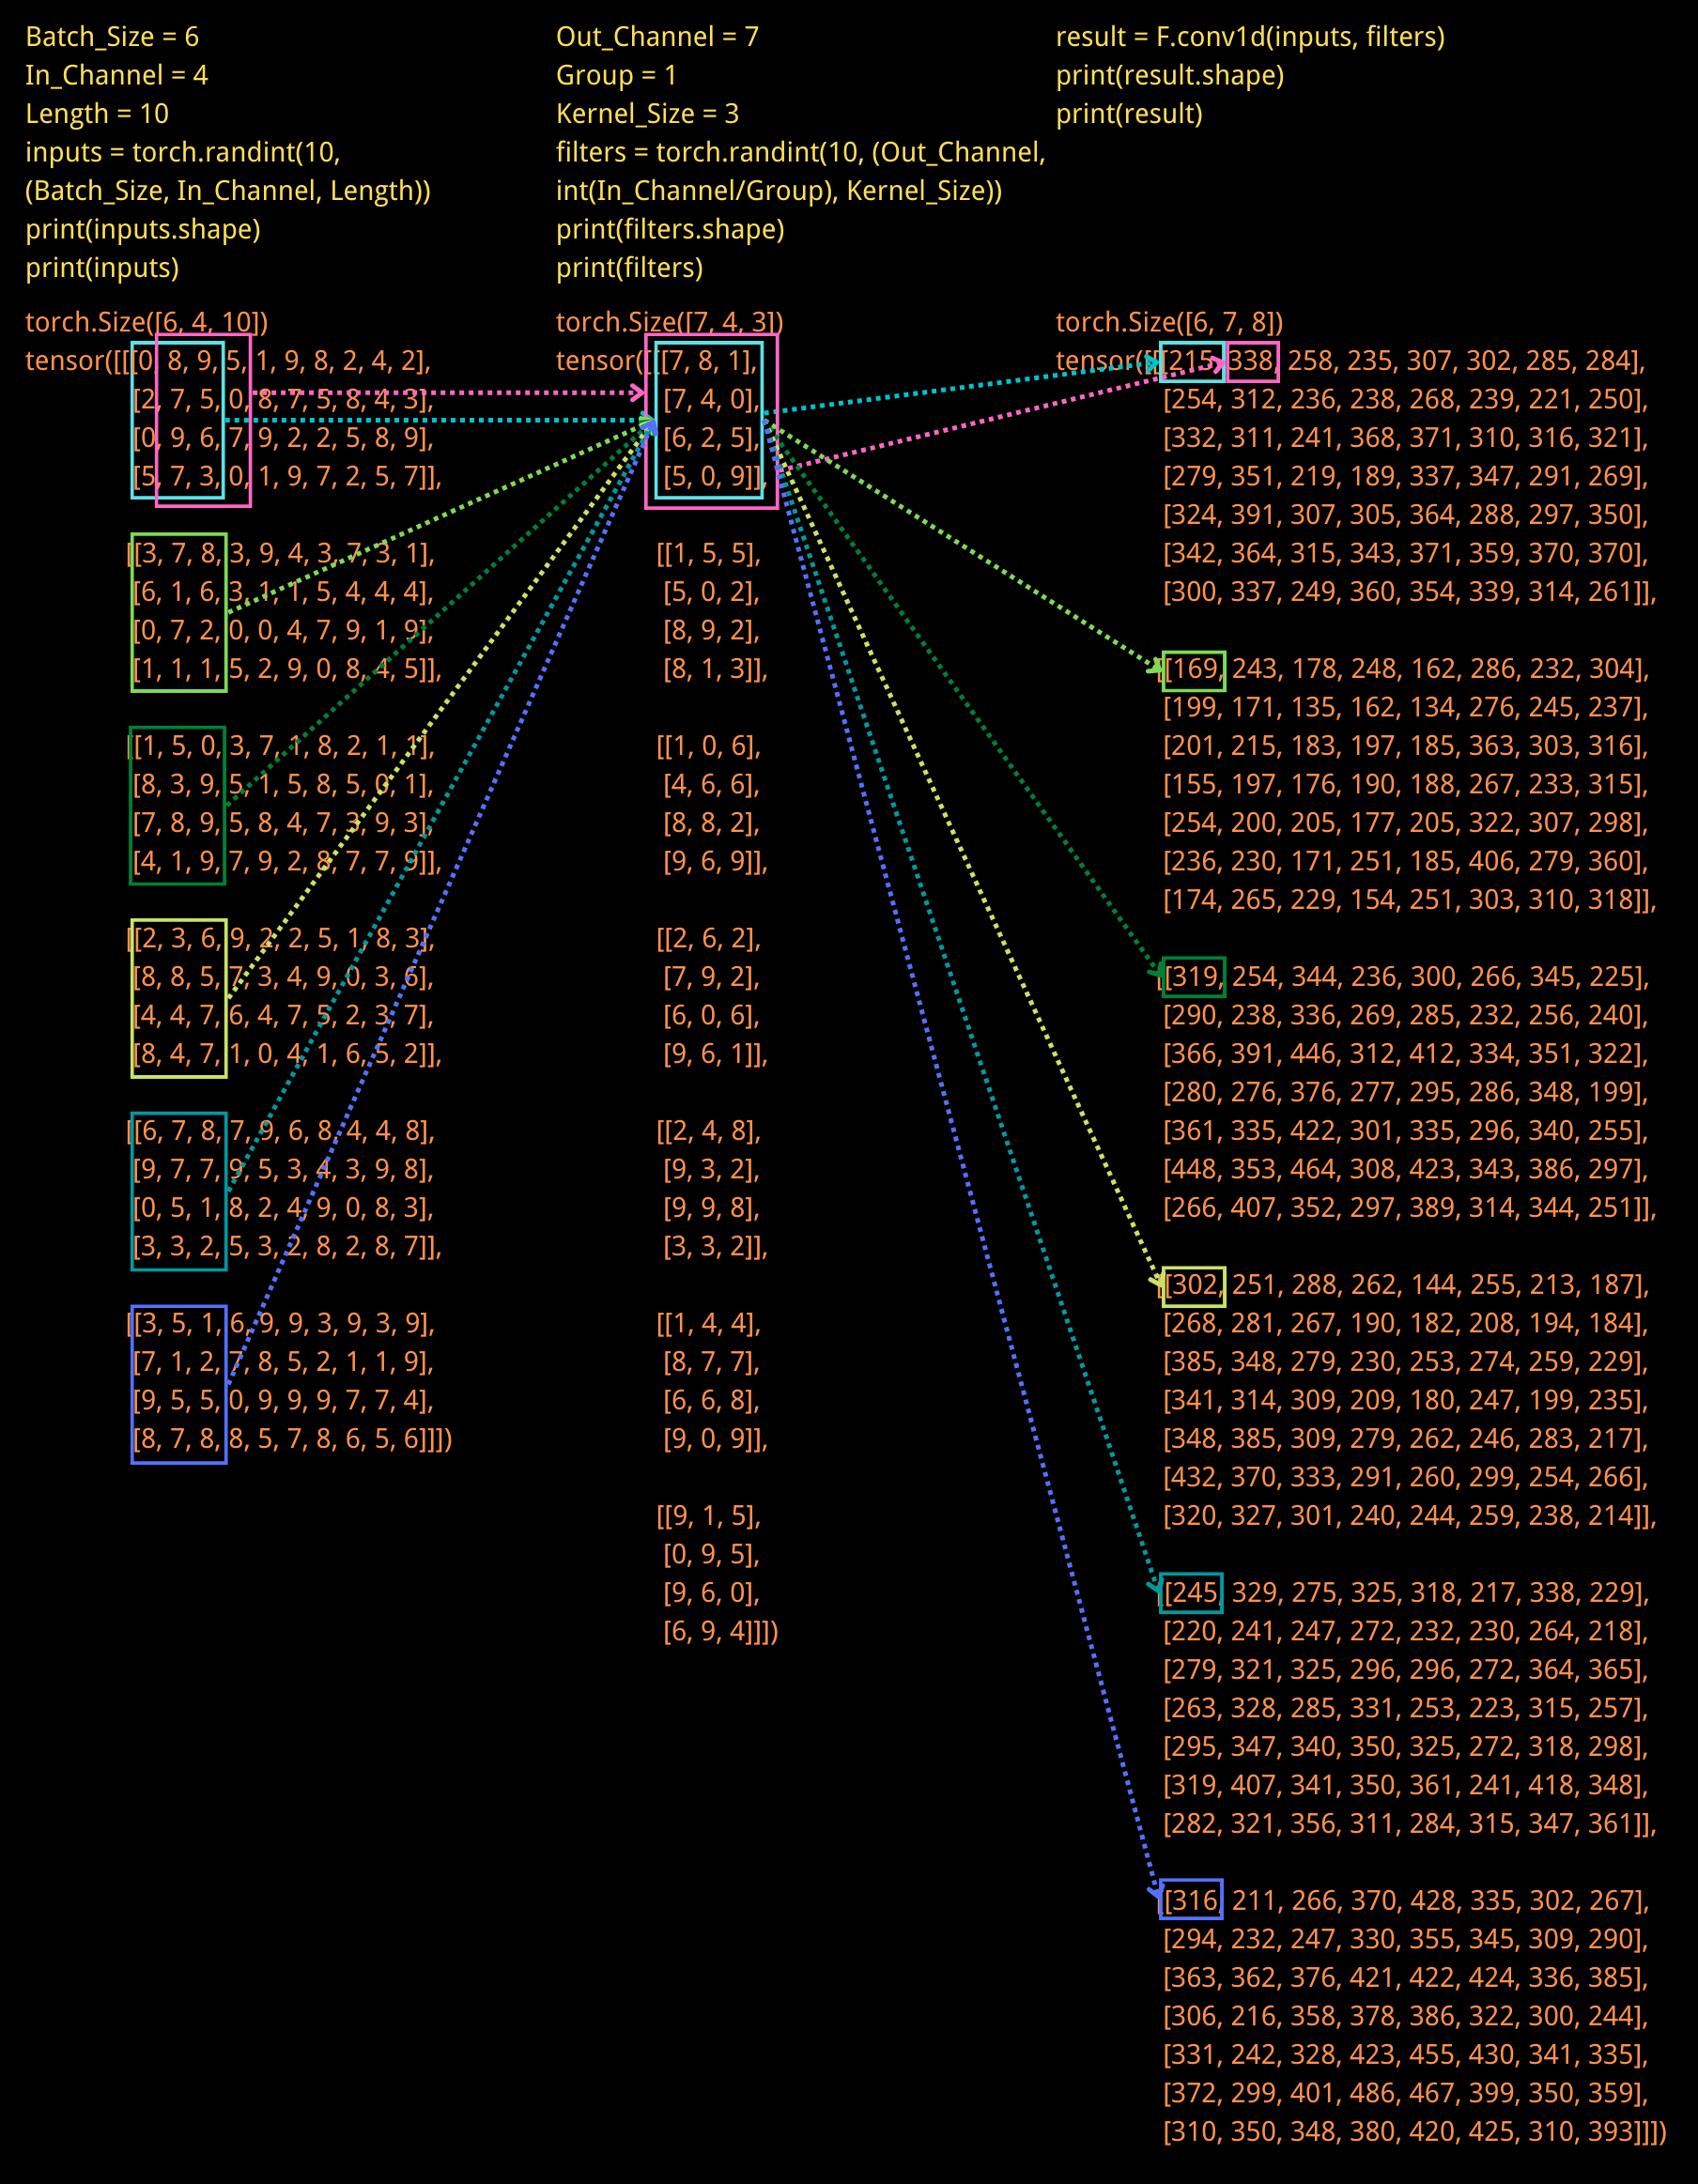

In [ ]:
Batch_Size = 1
In_Channel = 4
Length = 10
inputs = torch.randint(10, (In_Channel, Length))
print(inputs.shape)
print(inputs)

torch.Size([4, 10])
tensor([[1, 2, 9, 5, 4, 9, 0, 5, 3, 3],
        [3, 2, 6, 5, 1, 2, 7, 5, 8, 7],
        [6, 7, 8, 3, 3, 0, 0, 2, 6, 4],
        [3, 0, 0, 4, 5, 5, 8, 8, 1, 5]])


In [ ]:
Out_Channel = 7
Group = 1
Kernel_Size = 3
filters = torch.randint(10, (Out_Channel, int(In_Channel/Group), Kernel_Size))
print(filters.shape)
print(filters)

torch.Size([7, 4, 3])
tensor([[[9, 9, 9],
         [4, 3, 8],
         [7, 0, 1],
         [3, 4, 7]],

        [[5, 8, 9],
         [7, 3, 6],
         [2, 4, 4],
         [7, 1, 5]],

        [[4, 5, 5],
         [8, 0, 9],
         [5, 3, 6],
         [1, 5, 2]],

        [[4, 7, 3],
         [1, 5, 0],
         [6, 8, 1],
         [5, 1, 0]],

        [[7, 1, 2],
         [8, 3, 7],
         [0, 2, 5],
         [5, 3, 7]],

        [[0, 0, 2],
         [2, 4, 5],
         [6, 3, 5],
         [9, 5, 9]],

        [[4, 7, 1],
         [7, 8, 7],
         [3, 0, 8],
         [1, 0, 2]]])


In [ ]:
result = F.conv1d(inputs, filters)
print(result.shape)
print(result)

torch.Size([7, 8])
tensor([[233, 290, 319, 289, 295, 300, 248, 280],
        [258, 267, 253, 264, 233, 246, 280, 303],
        [239, 224, 235, 206, 193, 195, 260, 228],
        [173, 227, 193, 152, 138, 123, 146, 200],
        [168, 161, 214, 190, 196, 260, 243, 267],
        [186, 180, 182, 175, 205, 234, 237, 255],
        [191, 226, 222, 137, 181, 183, 241, 248]])


In [ ]:
test_input6 = np.array([[1, 2, 9], 
                       [3, 2, 6], 
                       [6, 7, 8], 
                       [3, 0, 0]])

test_filter6 = np.array([[9, 9, 9], 
                        [4, 3, 8], 
                        [7, 0, 1], 
                        [3, 4, 7]])
sum(sum(test_input6 * test_filter6))

233

In [ ]:
test_input7 = np.array([[1, 2, 9], 
                       [3, 2, 6], 
                       [6, 7, 8], 
                       [3, 0, 0]])

test_filter7 = np.array([[5, 8, 9], 
                        [7, 3, 6], 
                        [2, 4, 4], 
                        [7, 1, 5]])
sum(sum(test_input7 * test_filter7))

258

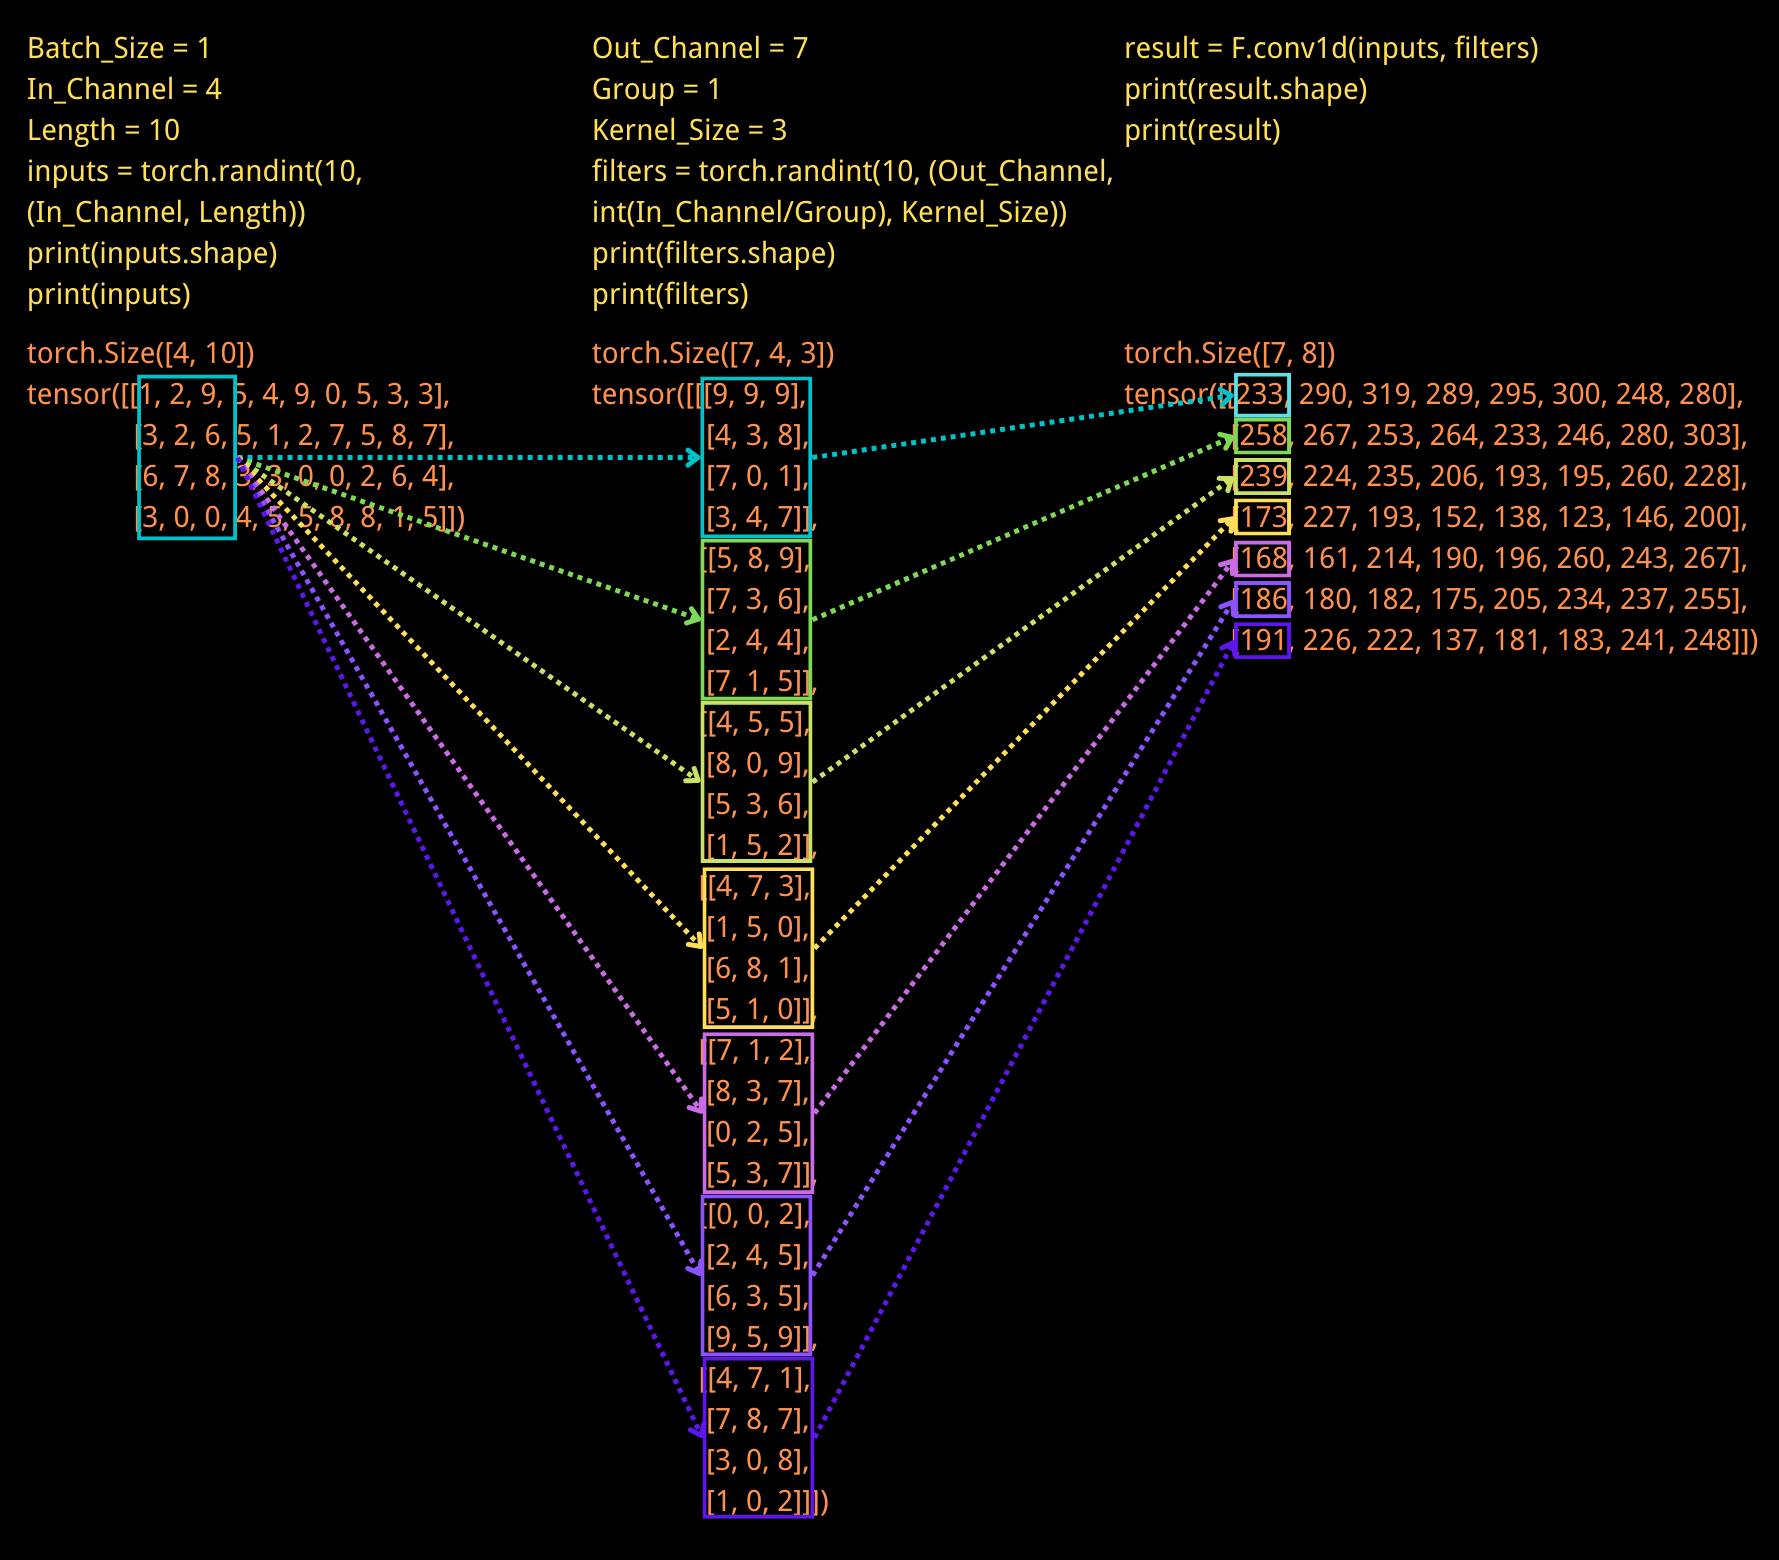